<a href="https://colab.research.google.com/github/bhaskatripathi/sceneGraphs/blob/main/scenegraphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.6/375.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.9/318.9 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.4 MB/s eta 0:00:00


In [ ]:
pip install torch opencv-python matplotlib networkx

In [ ]:
# Step 1: Clone the YOLOv5 repo and install dependencies
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 16960, done.
remote: Counting objects: 100% (155/155), done.
remote: Compressing objects: 100% (109/109), done.
remote: Total 16960 (delta 79), reused 96 (delta 46), pack-reused 16805 (from 1)
Receiving objects: 100% (16960/16960), 15.70 MiB | 23.34 MiB/s, done.
Resolving deltas: 100% (11608/11608), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.6/873.6 kB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.4 MB/s eta 0:00:00


In [ ]:
pip install matplotlib numpy pillow langchain openai langchain_community langchain-openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.9/399.9 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 8.4 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-9-21 Python-3.10.12 torch-2.4.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 
/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


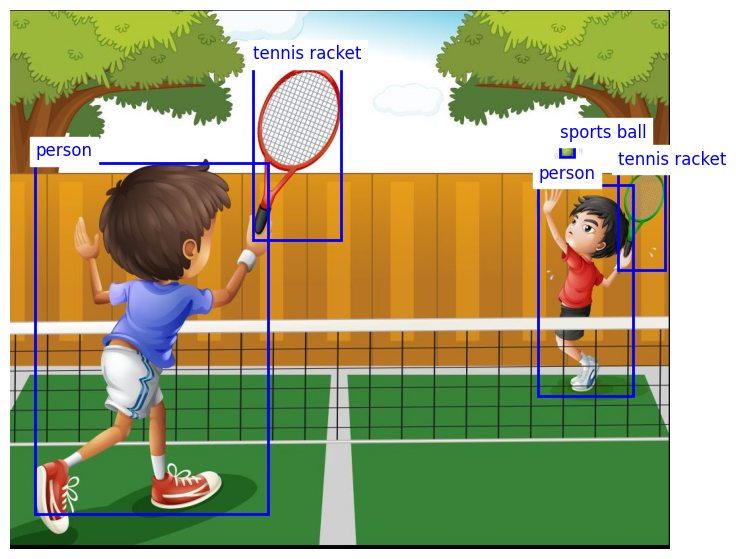

In [ ]:
# Step 2: Import necessary libraries
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from matplotlib.patches import Rectangle
from PIL import Image
%matplotlib inline

# Step 3: Load the pre-trained YOLOv5 model
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

output_path='/content'
# Step 4: Function to detect objects using YOLOv5
def detect_objects(image_path: str):
    # Load the image using Pillow (PIL)
    img = Image.open(image_path)

    # Run YOLOv5 inference
    results = model(img)

    # Extract bounding boxes and labels
    detected_objects = []
    for *box, conf, cls in results.xyxy[0]:  # bbox format: (x1, y1, x2, y2)
        x1, y1, x2, y2 = map(int, box)
        label = results.names[int(cls)]  # Get label name
        detected_objects.append((label, x1, y1, x2 - x1, y2 - y1))  # label, x, y, width, height

    return detected_objects

# Step 5: Function to simulate relationship extraction (this part can be replaced with actual model)
def detect_relationships(objects):
    # Example relationships, for real implementation you would need a relationship model
    relationships = []
    if "person" in [obj[0] for obj in objects] and "bus" in [obj[0] for obj in objects]:
        relationships.append(("person", "standing near", "bus"))
    if "car" in [obj[0] for obj in objects] and "bus" in [obj[0] for obj in objects]:
        relationships.append(("car", "behind", "bus"))
    return relationships

# Step 6: Function to plot the scene graph and object detections
def plot_scene_graph(image_path: str, objects, relationships):
    # Load the image using PIL
    image = Image.open(image_path)

    # Convert to numpy array for plotting with matplotlib
    image = np.array(image)

    # Plot the image with bounding boxes
    plt.figure(figsize=(10, 7))
    ax = plt.gca()
    ax.imshow(image)

    # Add bounding boxes to the image
    for (label, x, y, w, h) in objects:
        rect = Rectangle((x, y), w, h, linewidth=2, edgecolor='blue', facecolor='none')
        ax.add_patch(rect)
        plt.text(x, y - 10, label, color='blue', fontsize=12, backgroundcolor='white')

    #plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.axis('off')
    plt.show()

# Step 7: Use the bus image that comes with YOLOv5
image_path = '/content/two boys.JPG'

# Step 8: Detect objects and relationships
objects = detect_objects(image_path)
relationships = detect_relationships(objects)

# Step 9: Plot the scene graph and the detected objects on the image
plot_scene_graph(image_path, objects, relationships)





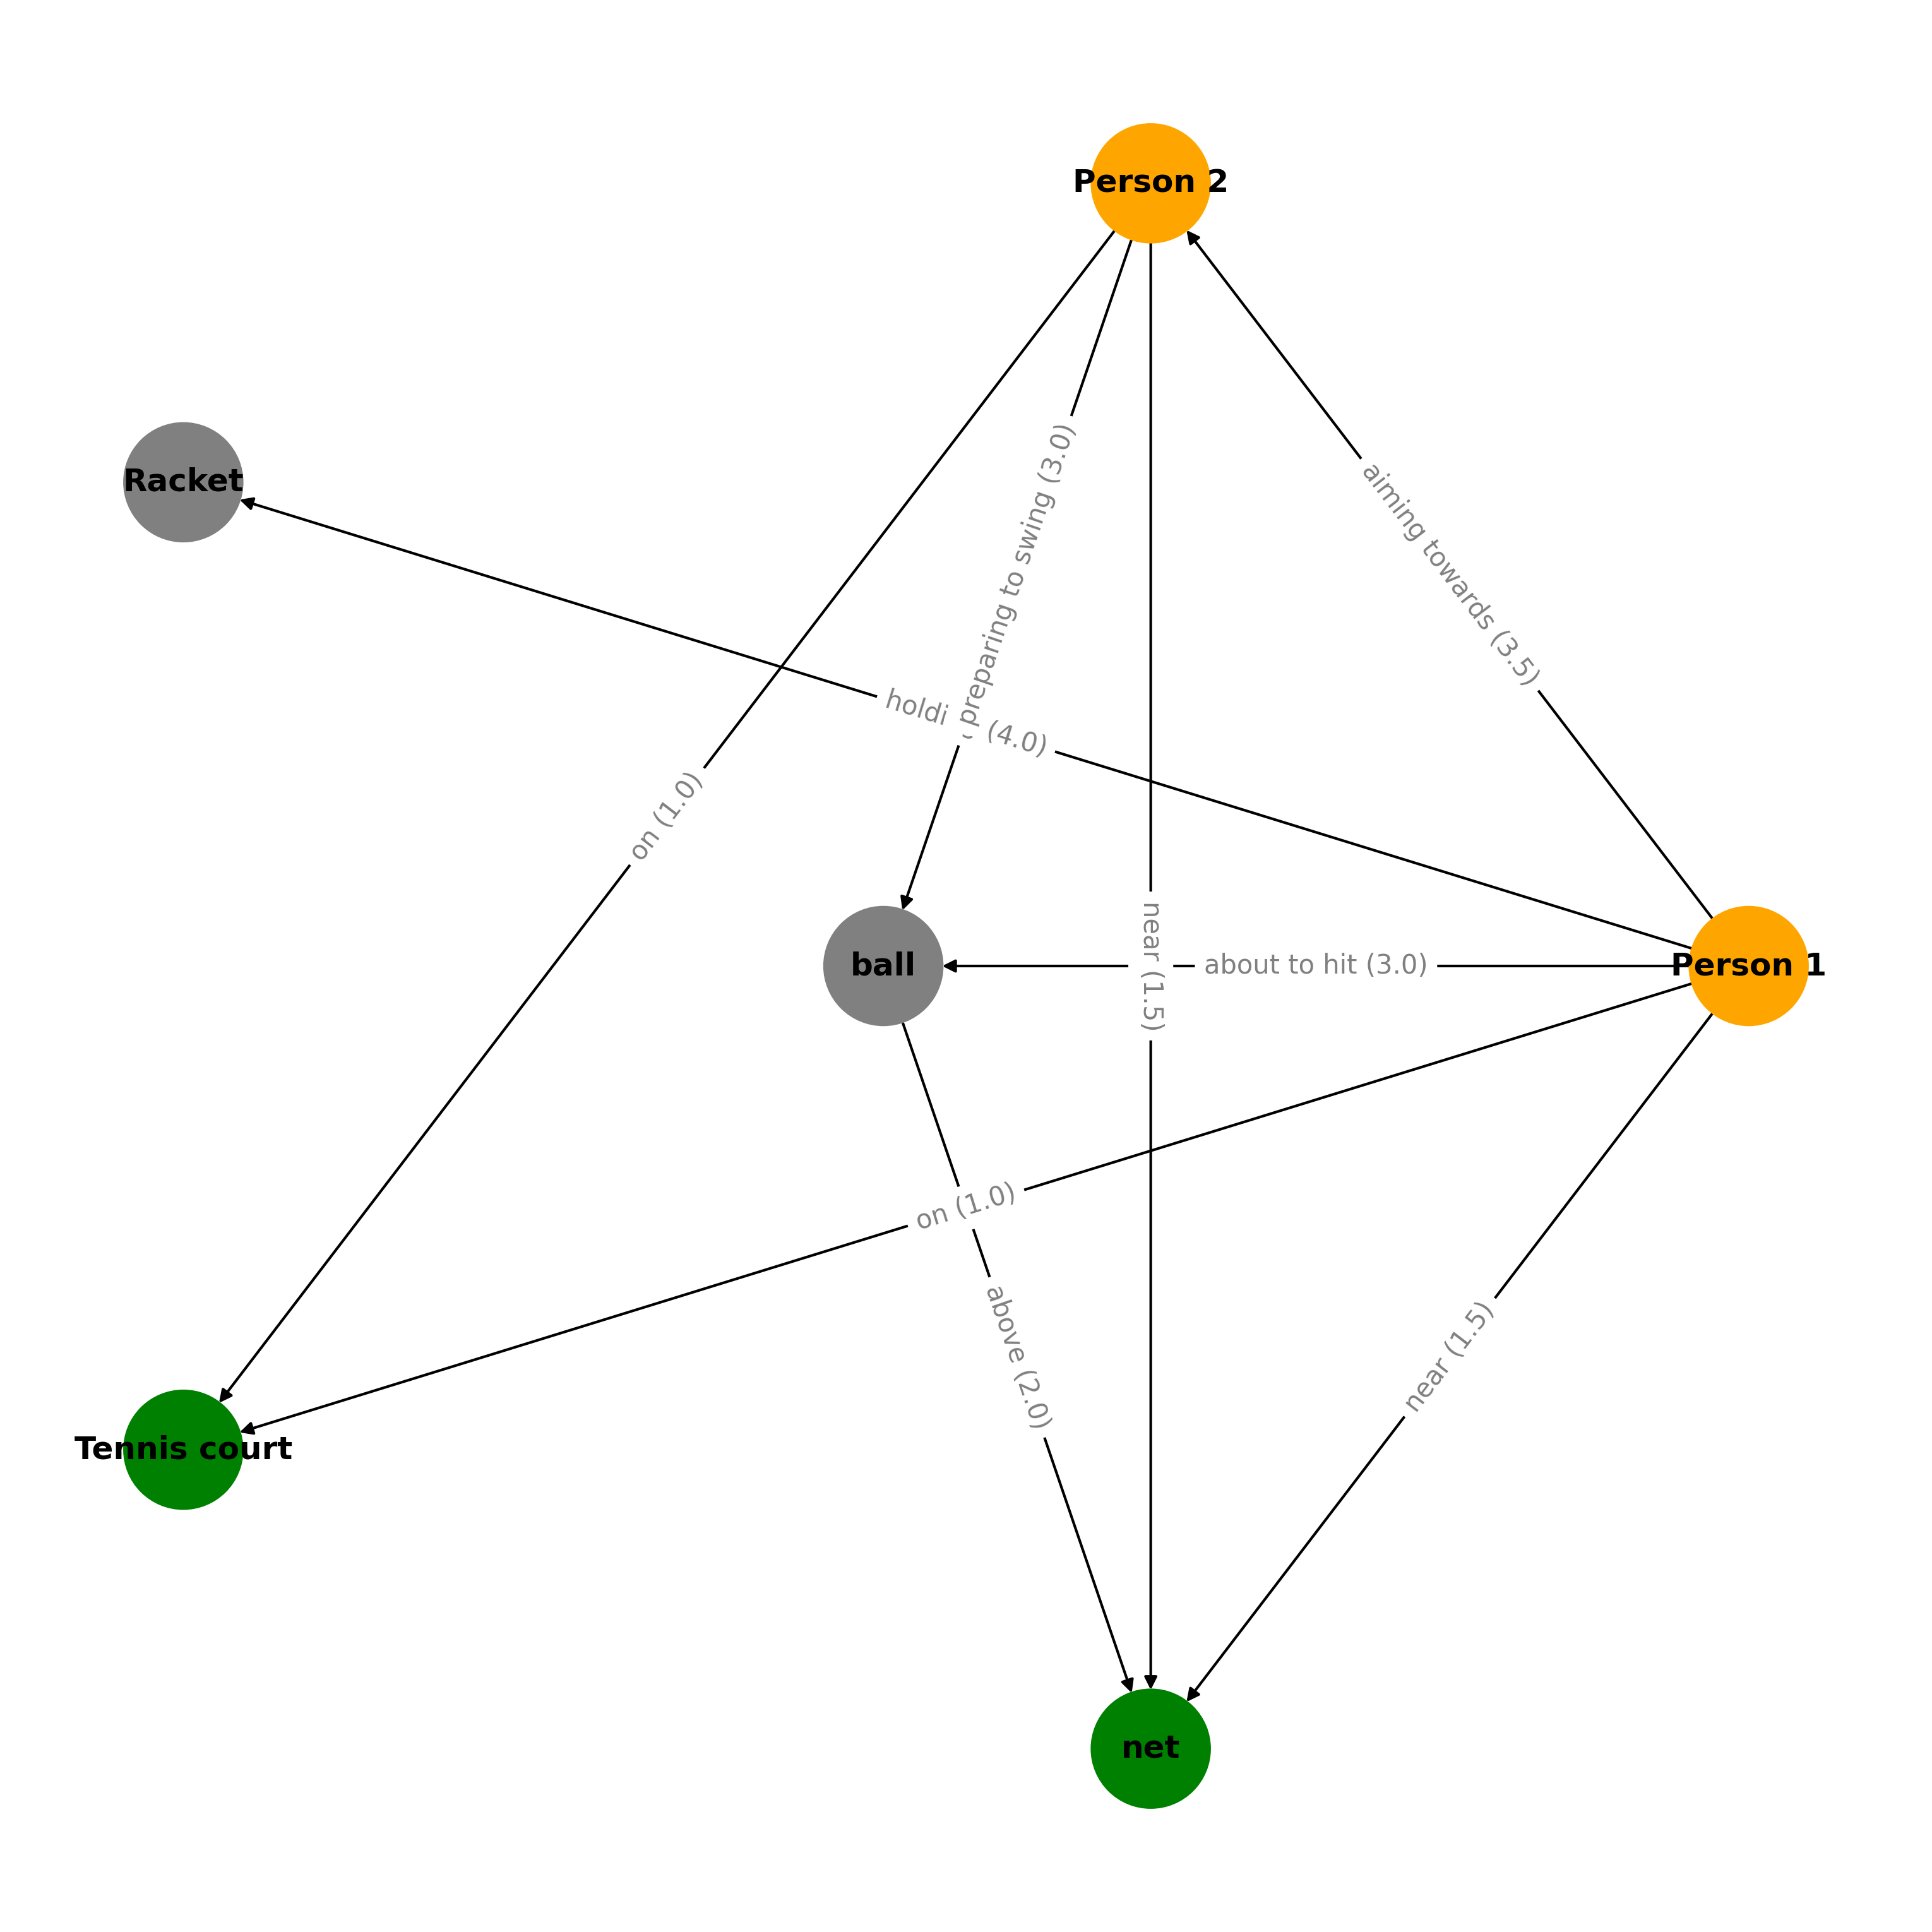

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# Function to simulate relationships and return a graph
def add_relationships():
    G = nx.DiGraph()
    G.add_node("Person 1")
    G.add_node("Person 2")
    G.add_node("ball")
    G.add_node("Racket")
    G.add_node("Tennis court")
    G.add_node("net")
    G.add_edge("Person 1", "ball", label="about to hit", weight=3.0)
    G.add_edge("Person 2", "ball", label="waiting to receive", weight=2.5)
    G.add_edge("Person 1", "Racket", label="holding", weight=4.0)
    G.add_edge("Person 1", "Tennis court", label="on", weight=1.0)
    G.add_edge("Person 2", "Tennis court", label="on", weight=1.0)
    G.add_edge("Person 1", "net", label="near", weight=1.5)
    G.add_edge("Person 2", "net", label="near", weight=1.5)
    G.add_edge("ball", "net", label="above", weight=2.0)
    G.add_edge("Person 1", "Person 2", label="aiming towards", weight=3.5)
    G.add_edge("Person 2", "ball", label="preparing to swing", weight=3.0)

    return G


def plot_circular_scene_graph(G, center_node, node_colors):
    edge_nodes = set(G) - {center_node}
    pos = nx.circular_layout(G.subgraph(edge_nodes))
    pos[center_node] = np.array([0, 0])
    plt.figure(figsize=(10, 10), dpi=300)
    node_color_values = [node_colors.get(node, "lightblue") for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_color_values, node_size=2000, font_size=12, font_weight='bold', arrows=True)
    edge_labels = nx.get_edge_attributes(G, 'label')
    edge_weights = nx.get_edge_attributes(G, 'weight')
    combined_labels = {key: f"{edge_labels[key]} ({edge_weights[key]:.1f})" for key in edge_labels}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=combined_labels, font_color='gray')
    plt.show()

node_colors = {
    "Person 1": "orange",
    "Person 2": "orange",
    "ball": "gray",
    "Racket": "gray",
    "Tennis court": "green",
    "net": "green"
}

G = add_relationships()
plot_circular_scene_graph(G, center_node="ball", node_colors=node_colors)


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
from transformers import CLIPModel, CLIPProcessor
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

def plot_and_save_scene_graph(G, center_node, node_colors, filename):
    edge_nodes = set(G) - {center_node}
    pos = nx.circular_layout(G.subgraph(edge_nodes))
    pos[center_node] = np.array([0, 0])
    plt.figure(figsize=(10, 10), dpi=300)

    node_color_values = [node_colors.get(node, "lightblue") for node in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=node_color_values, node_size=2000, font_size=12, font_weight='bold', arrows=True)
    edge_labels = nx.get_edge_attributes(G, 'label')
    edge_weights = nx.get_edge_attributes(G, 'weight')
    combined_labels = {key: f"{edge_labels[key]} ({edge_weights[key]:.1f})" for key in edge_labels}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=combined_labels, font_color='gray')

    plt.savefig(filename)
    plt.close()

node_colors = {
    "Person 1": "orange",
    "Person 2": "orange",
    "ball": "gray",
    "Racket": "gray",
    "Tennis court": "green",
    "net": "green"
}

def generate_scene_graph_description(G):
    description = []

    for u, v, data in G.edges(data=True):
        weight = data['weight']

        # Contextual description based on weight values
        if weight >= 3.5:
            strength = "strongly"
        elif 2.0 <= weight < 3.5:
            strength = "moderately"
        else:
            strength = "slightly"

        relationship = f"{u} is {strength} {data['label']} {v}."
        description.append(relationship)

    return " ".join(description)

G = add_relationships()
scene_description_with_weights = generate_scene_graph_description(G)
print("Generated Scene Graph Description with Weights:", scene_description_with_weights)



Generated Scene Graph Description with Weights: Person 1 is moderately about to hit ball. Person 1 is strongly holding Racket. Person 1 is slightly on Tennis court. Person 1 is slightly near net. Person 1 is strongly aiming towards Person 2. Person 2 is moderately preparing to swing ball. Person 2 is slightly on Tennis court. Person 2 is slightly near net. ball is moderately above net.


## Story Generated by Graph Output

In [ ]:
from IPython.display import display, HTML
from openai import OpenAI
import os
os.environ["OPENAI_API_KEY"] = "sk-"
client = OpenAI()
from openai import OpenAI
import os

client = OpenAI()
scene_description = scene_description_with_weights
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that interprets a scene graph and writes a detailed story based on the user's input."
        },
        {
            "role": "user",
            "content": f"The following is a description of a tennis match generated from a scene graph: {scene_description}. Please interpret the relationships between the objects and create a detailed narrative about what is happening."
        }
    ],
    temperature=0.7,
    max_tokens=512,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    response_format={
        "type": "text"
    }
)

# Extract and display the generated story
story = response.choices[0].message.content
html_story = "<p>" + story.replace("\n", "<br>") + "</p>"
display(HTML(html_story))


# Story Generated by Combined Graph output + Vision model output

In [ ]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Step 1: Encoding the image for GPT vision model
image_path = "/content/two boys.JPG"
base64_image = encode_image(image_path)

scene_description = scene_description_with_weights

# Step 3: Sending combined scene description from Graph and vision model to LLM
response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that interprets both a scene graph and an image to write a detailed story based on the user's input."
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": f"The following is a description of a scene graph generated from an image: {scene_description}. Please interpret the relationships between the objects and also analyze the image to create a detailed narrative about what is happening."
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}"
                    }
                }
            ]
        }
    ],
    temperature=0.7,
    max_tokens=512,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    response_format={
        "type": "text"
    }
)

story = response.choices[0].message.content
html_story = "<p>" + story.replace("\n", "<br>") + "</p>"
display(HTML(html_story))


# With Chain of Thoughts

In [ ]:
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Step 1: Encoding the image for GPT vision model
image_path = "/content/two boys.JPG"
base64_image = encode_image(image_path)

scene_description = scene_description_with_weights  # Dynamic scene description from the graph

# Chain of Thought reasoning steps
cot_steps = [
    "Identify all the objects present in the scene and explain each one briefly.",
    "Analyze how these objects relate to one another based on the scene graph and their proximity in the image.",
    "Think through possible interactions between these objects and what these interactions signify or imply about the scene."
]

# Call 1: Reasoning through the steps without generating the final story
reasoning_prompt = (
    f"Here are the observations generated from the scene graph: {scene_description}.\n"
    "Please reason step by step as follows:\n"
    f"1. {cot_steps[0]}\n"
    f"2. {cot_steps[1]}\n"
    f"3. {cot_steps[2]}\n"
)

# Sending the reasoning request to the GPT model
response_reasoning = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that interprets both a scene graph and an image. Please reason through each step, identify the objects, analyze relationships, and think about possible interactions."
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": f"{reasoning_prompt}"
                },
                {
                    "type": "image_url",
                    "image_url": {
                        "url": f"data:image/jpeg;base64,{base64_image}"
                    }
                }
            ]
        }
    ],
    temperature=0.7,
    max_tokens=512,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    response_format={
        "type": "text"
    }
)

# Extract the step-by-step reasoning response
step_by_step_reasoning = response_reasoning.choices[0].message.content

# Call 2: Generate the final narrative based on the reasoning
final_story_prompt = (
    f"Based on the following reasoning about the scene: {step_by_step_reasoning}, please generate a detailed narrative that explains the interactions and events happening in the scene."
)
response_story = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "system",
            "content": "You are a helpful assistant that writes detailed stories based on the user's input."
        },
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": f"{final_story_prompt}"
                }
            ]
        }
    ],
    temperature=0.7,
    max_tokens=1024,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    response_format={
        "type": "text"
    }
)

# Extract and display the final generated story
final_story = response_story.choices[0].message.content
html_story = "<p>" + final_story.replace("\n", "<br>") + "</p>"
display(HTML(html_story))
